In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from sklearn import preprocessing
from datetime import datetime, timedelta
import time
from collections import Counter
import os
os.chdir('..')
from sqlalchemy import create_engine
import pickle

Using TensorFlow backend.


In [2]:
plt.rcParams["figure.figsize"] = (14,7)
plt.rcParams.update({'font.size': 15})

In [53]:
symbols = ['ABT','AXP','CAT','KO','CL','TGT','XOM','F','LLY','MCD','CVS','PEP','CVX','TXN','TMO','UNP','WMT','JNJ','NKE','AAPL','HD','VZ','T','MO','HON','MSFT','ADBE','CSCO','GS','PM','BLK','FB','DUK','COP','UTX']

In [54]:
def predict_days(startday, days_topredict, data, model):
    curr_data = data[startday,:,:]
    predictions = []
    for day in range(days_topredict):
        prediction = model.predict(curr_data.reshape(1,curr_data.shape[0],curr_data.shape[1]))[0][0]
        predictions.append(prediction)
        new_row = curr_data[-1,:]
        new_row[0] = prediction
        curr_data = np.vstack((curr_data[1:,:], new_row))
    return predictions

In [59]:
predictions = []
def prediction_with_model(x_test,model,scaler,x_test_m,model_m,scaler_m):
    days = 30
    plt.plot(inv_price_transform(y_test[:90],scaler), c='k')
    for segment in range(3):
        prediction = predict_days(segment*days, days, x_test, model)
        prediction_m = predict_days(segment*days, days, x_test_m, model_m)
        plt.plot(range(segment*days, segment*days+days), inv_price_transform(prediction, scaler),c = "green")
        plt.plot(range(segment*days, segment*days+days), inv_price_transform(prediction_m, scaler_m),c = "red")
        plt.axvline(segment*days, c='k', linestyle='dashed', linewidth=1)
        plt.axvline(segment*days+days, c='k', linestyle='dashed', linewidth=1)
    plt.title("Lookahead for {0}".format(symbol))
    plt.xlabel("Number of days")
    plt.ylabel("Actual vs Predicted")
    plt.legend(['Actual value', 'Prediction with all the features','Prediction with mean price'],loc = 3,prop={'size':12})
    plt.savefig("/home/asus/file_project/final/prediction_plot_{0}.png".format(symbol))
    plt.show(block=False)
    plt.pause(3)
    plt.close()
    return prediction


In [60]:
def inv_price_transform(normalized_data, scaler):
    ''' inverse from normalized price to raw price '''
    m = scaler.mean_[0]
    s = scaler.scale_[0]
    return s*np.array(normalized_data)+m

for the company VZ
30
30
30
30
30
30


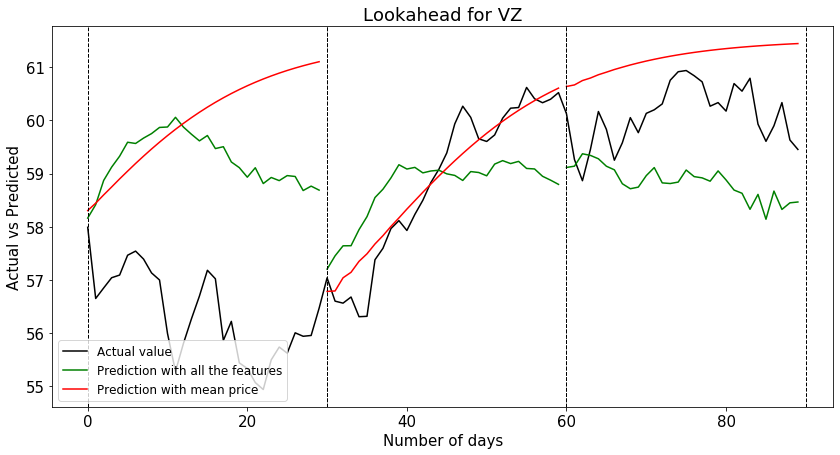

57.99
58.465


In [61]:
actual_values = []
predicted_values = []
for symbol in symbols:
    x_test = pickle.load(open("/home/asus/file_project/x_test_{0}.pkl".format(symbol), "rb" ) )
    y_test = pickle.load(open("/home/asus/file_project/y_test_{0}.pkl".format(symbol), "rb" ) )
    scaler = pickle.load(open("/home/asus/file_project/scaler_{0}.pkl".format(symbol), "rb" ) )
    model = load_model('/home/asus/file_project/model_{0}.h5'.format(symbol))
    
    x_test_m = pickle.load(open("/home/asus/file_project/mean_price/x_test_{0}.pkl".format(symbol), "rb" ) )
    y_test_m = pickle.load(open("/home/asus/file_project/mean_price/y_test_{0}.pkl".format(symbol), "rb" ) )
    scaler_m = pickle.load(open("/home/asus/file_project/mean_price/scaler_{0}.pkl".format(symbol), "rb" ) )
    model_m = load_model('/home/asus/file_project/mean_price/model_{0}.h5'.format(symbol))
    
    
    print("for the company {0}".format(symbol))
    prediction = prediction_with_model(x_test,model,scaler,x_test_m,model_m,scaler_m)
    actual_value = inv_price_transform(y_test[0],scaler)
    print(round(actual_value,3))
    predicted_value = inv_price_transform(prediction[29],scaler)
    print(round(predicted_value,3))